<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/Classification_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

**Problem Statement:**

Suppose you are a data scientist working for a bank that recently conducted a marketing campaign to promote term deposits to its clients. The bank collected data on various client characteristics, such as age, job type, marital status, education level, and more. Your task is to analyze this dataset and build a machine learning model to predict whether a client will subscribe to a term deposit or not.

<center><img src="https://img.etimg.com/thumb/width-420,height-315,imgsize-51456,resizemode-75,msid-110798763/markets/stocks/news/will-short-term-narrative-headwinds-for-psu-banks-bring-back-mojo-to-private-sector-banks-5-banks-with-an-upside-potential-of-up-to-24/bankk.jpg"/></center>

By accurately predicting client subscription behavior, your model will enable the bank to optimize its marketing efforts. It will help identify potential clients who are more likely to subscribe to the term deposit, allowing the bank to focus its resources on targeting these individuals. This targeted approach will not only increase the effectiveness of the marketing campaign but also maximize the bank's return on investment.

# STEP 1: Import the necessary Libraries

In [ ]:
# Import the necessary libraries
# Data manipulation and numerical operationsimport pandas as pd
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# STEP 2: Loading the Data

**Dataset Information:**
Content: Each row represents a customer, and each column contains attributes related to the customer's socio-economic background, bank contact information, and the outcome of a marketing campaign.

The dataset includes information about:

- **Demographic Information:** Age, job type, marital status, education level, whether the customer has a loan or housing loan, and whether they have defaulted on a loan.

- **Bank Contact Information:** The method of contact (cellular, telephone), last contact month, last contact day of the week, duration of the last contact, and number of contacts performed during this campaign.

- **Socio-Economic Indicators:** Employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and the number of employees.

- **Campaign Outcome:** Whether the client has subscribed to a term deposit (the column is called y).

### 2.1 Load the data & view it

*Hint: Use `;` as the delimiter.*

In [ ]:
# Mount Drive to get to my Google Drive files/ path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
# Read the csv file
bank_data_df = pd.read_csv('/content/drive/MyDrive/classification_2/bank_data.csv', delimiter = ';')
# Viewing the data
bank_data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 View the columns of the data and understand them

In [ ]:
# View the columns of the dataset
bank_data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [ ]:
# Checking the shape of the data
bank_data_df.shape

(41188, 21)

### 2.4 Understand the datatypes of each of the columns

In [ ]:
# Check the dataset info
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# STEP 3: EDA

### 3.1 Check the distribution of the target variable - `y`.

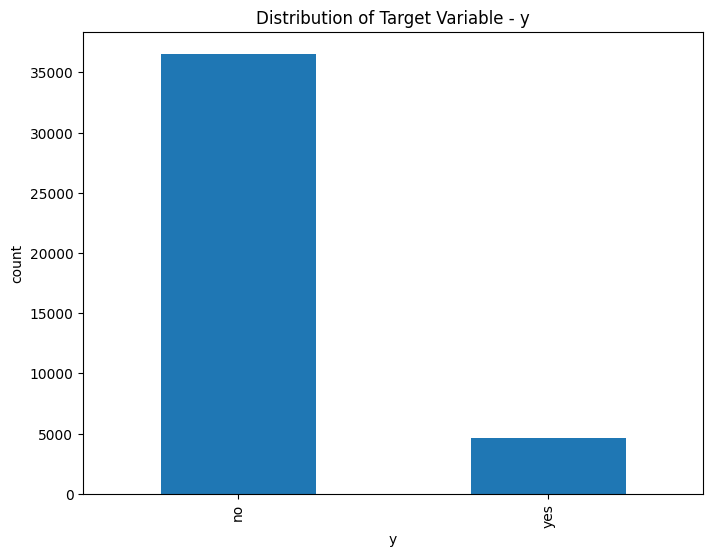

In [ ]:
### Checking the distribution of the target variable 'y'

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Create a count plot for the 'y' variable in the dataset
bank_data_df.y.value_counts().plot(kind='bar')

# Add a title to the plot
plt.title('Distribution of Target Variable - y')

# Add labels to the x-axis and y-axis


# Label the x-axis
plt.xlabel('y')

# Label the y-axis
plt.ylabel('count')


# Display the plot
plt.show()


### 3.2 Do an analysis of the `Subscription Rate` variable wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [ ]:
# Listing all the categorical columns
categorical_columns = bank_data_df.select_dtypes(include='object').columns

categorical_columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

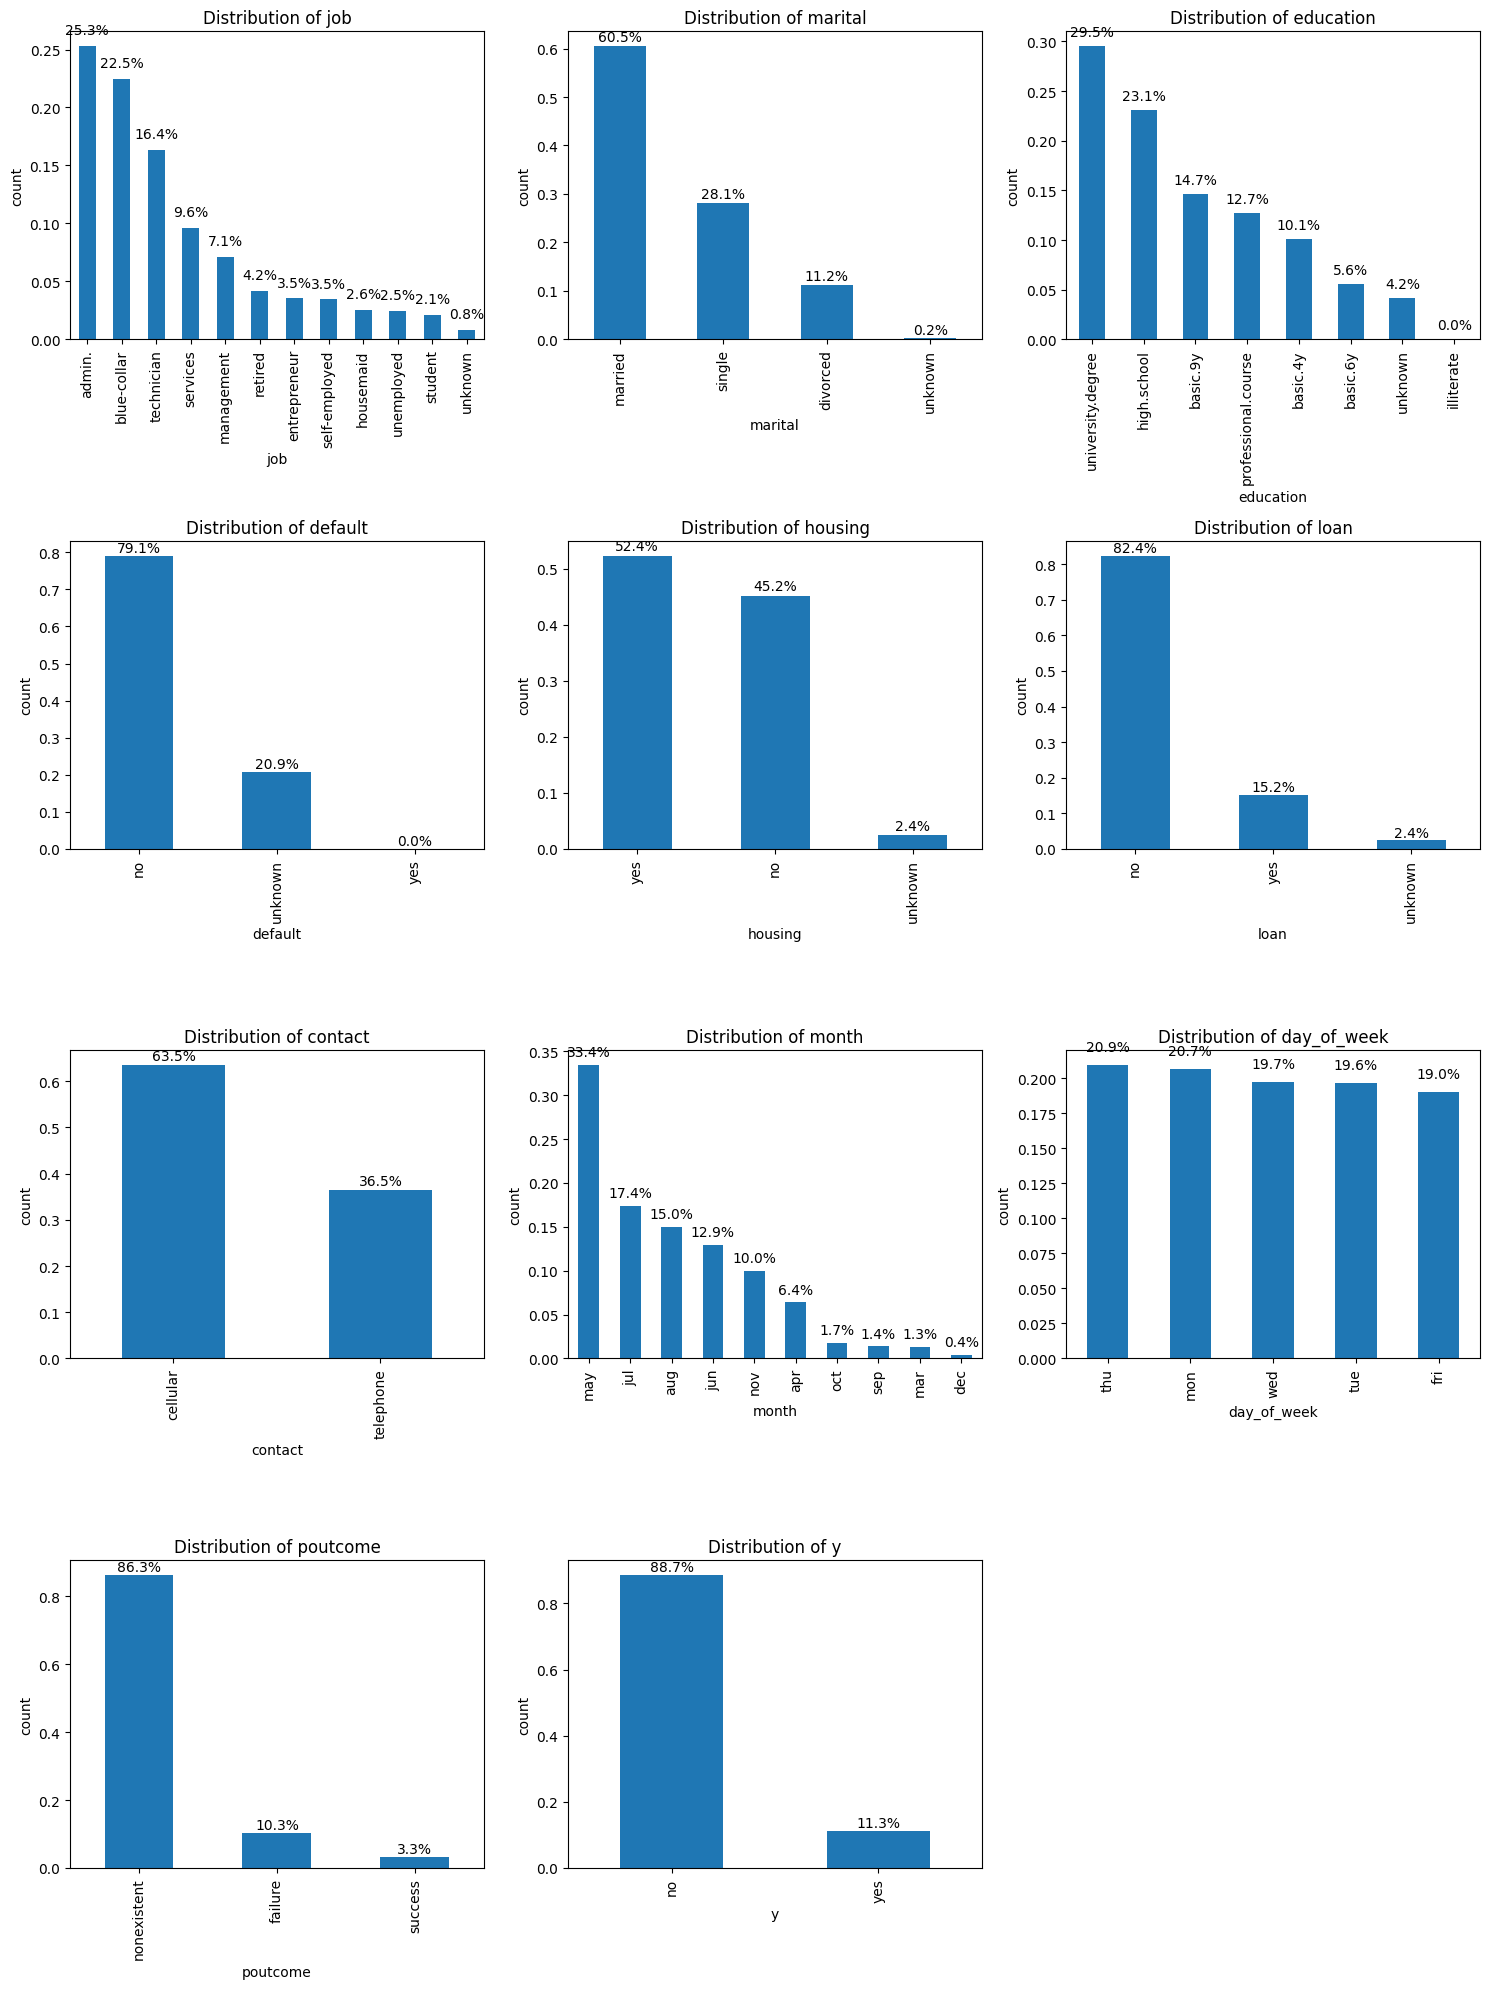

In [ ]:
# Adjusting layout
fig, axes = plt.subplots(4, 3, figsize=(15, 20))  # 4 rows, 3 columns
plt.subplots_adjust(hspace=0.5)

# Plotting each categorical feature in a subplot
for i, category in enumerate(categorical_columns):
    # Calculate row and column index for the subplot
    row = i // 3  # Integer division to determine row
    col = i % 3   # Modulo operation to determine column

    # Plotting the normalized counts as bar plots on the specific subplot
    bank_data_df[category].value_counts(normalize=True).plot(kind='bar', ax=axes[row, col])

    # Setting title and labels
    axes[row, col].set_title(f'Distribution of {category}')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('count')

    # Add percentage labels to bars in chart
    for p in axes[row, col].patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        axes[row, col].text(x + width/2,
                 y + height + 0.01,
                 '{:.1%}'.format(height),
                 ha="center")

# Remove any empty subplots if the number of categorical columns is not a multiple of the grid size
# This prevents unnecessary empty spaces in the figure
for i in range(len(categorical_columns), 4 * 3):
    #Check if the axes object exists before deleting
    try:
        fig.delaxes(axes.flatten()[i])
    except KeyError:
        #If the axes doesn't exist, this will prevent an error and allow the loop to continue.
        pass

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# STEP 4: Feature Engineering

### 4.1 Do a correlation analysis of the data

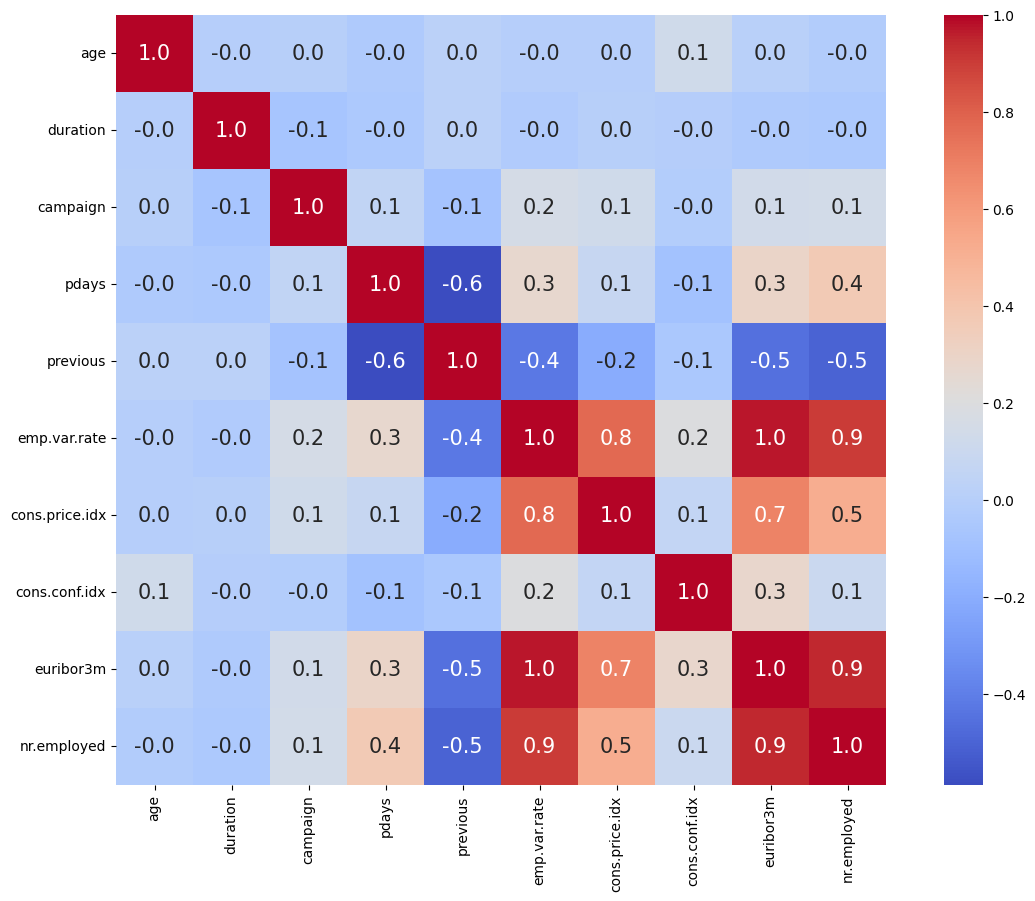

In [ ]:
###Correlation analysis of the dataset

# Set the figure size to make the heatmap more readable
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
numeric_features = bank_data_df.select_dtypes(include='number')

corr = numeric_features.corr()

# Display the heatmap
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

### 4.2 Plot a heat map for the top 3 highly correlated variables

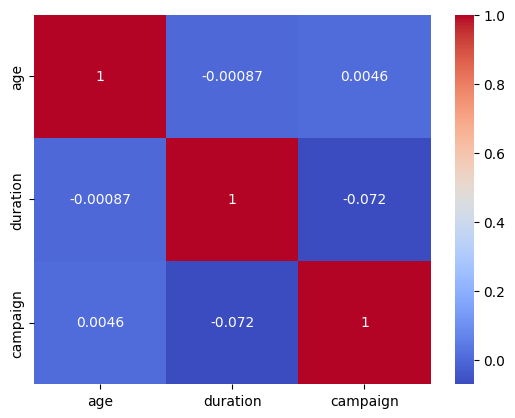

In [ ]:
# Plot the Heat map for the top 3 correlated variables
sns.heatmap(corr[['age', 'duration', 'campaign']].loc[['age', 'duration', 'campaign']], annot=True, cmap='coolwarm')
plt.show()

# STEP 5: Feature Engineering

### 5.1 Create a new feature `pdays999`

Create a new binary feature `pdays999` that indicates whether the pdays value is 999.

In the context of marketing data, `pdays=999` often represents customers who were not previously contacted. This feature might be more informative than the raw pdays values.

In [ ]:
# Create a binary feature indicating if 'pdays' equals 999, which likely represents customers not previously contacted
bank_data_df['pdays999'] = bank_data_df['pdays'].apply(lambda x: 1 if x == 999 else 0)


# View the new feature created
bank_data_df['pdays999']

,pdays999
0,1
1,1
2,1
3,1
4,1
...,...
41183,1
41184,1
41185,1
41186,1


## 5.2 Drop the original `pdays`column, `euribor3m`, `nr.employed` columns

In [ ]:
# Dropping the original 'pdays' column since it's now represented by 'pdays999'
# Dropping 'euribor3m', 'nr.employed' due to its high multicollinearity with  'emp.var.rate'
bank_data_df.drop(columns=['pdays', 'euribor3m', 'nr.employed'], inplace=True)


# Display the first few rows of the updated dataframe to verify changes
bank_data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdays999
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,no,1


### 5.3 Add the `pdays999` column to the list of categorical columns already created

In [ ]:
# Append the column `pdays999` to the categorical columns list created already.
# Also, drop the 'y' column from this object since I am going to convert the 'y' colimn to a binary 1 or 0 for the model
categorical_columns = categorical_columns.insert(len(categorical_columns), 'pdays999')
categorical_columns = categorical_columns.drop('y')

# Check the updated index
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'pdays999'],
      dtype='object')

### 5.4 Convert the categorical features to dummies and prepare for modelling

In [ ]:
# Before one-hot encoding, convert 'y' to numerical
bank_data_df['y'] = bank_data_df['y'].map({'yes': 1, 'no': 0})

# Get all columns, excluding 'y' for one-hot encoding
columns_to_encode = [col for col in bank_data_df.columns if col != 'y' and bank_data_df[col].dtype == 'object']
columns_to_encode.append('pdays999')


In [ ]:
# Create dummies for categorical variables
one_hot_df = pd.get_dummies(bank_data_df, columns=columns_to_encode, drop_first=True)

# Check the data
one_hot_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_1
0,56,261,1,0,1.1,93.994,-36.4,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
1,57,149,1,0,1.1,93.994,-36.4,0,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
2,37,226,1,0,1.1,93.994,-36.4,0,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
3,40,151,1,0,1.1,93.994,-36.4,0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
4,56,307,1,0,1.1,93.994,-36.4,0,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True


In [ ]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   y                              41188 non-null  int64  
 8   job_blue-collar                41188 non-null  bool   
 9   job_entrepreneur               41188 non-null  bool   
 10  job_housemaid                  41188 non-null  bool   
 11  job_management                 41188 non-null  bool   
 12  job_retired                    41188 non-null 

### 5.5 Check for null values after the dummies creation & handle them if required

In [ ]:
# Checking for null values
one_hot_df.isnull().sum()

,0
age,0
duration,0
campaign,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
y,0
job_blue-collar,0
job_entrepreneur,0


# STEP 6: Model Building

### 6.1 Split the data into train and test

In [ ]:
# Separate the features (X) from the target variable (y)
X = one_hot_df.drop(columns=['y'])
y = one_hot_df['y']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the data
X_train.head()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_1
12556,40,94,2,0,1.4,93.918,-42.7,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
35451,31,116,4,0,-1.8,92.893,-46.2,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
30592,59,13,6,1,-1.8,92.893,-46.2,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
17914,43,94,5,0,1.4,93.918,-42.7,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True
3315,39,344,2,0,1.1,93.994,-36.4,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True


### 6.2 Build a Naive Bayes Classifier on the data


In [ ]:
# Import the module
from sklearn.naive_bayes import GaussianNB


# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)


# Predict on the test set
y_pred = nb.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.47      0.46       935

    accuracy                           0.87      8238
   macro avg       0.69      0.70      0.69      8238
weighted avg       0.88      0.87      0.88      8238



### 6.3 Build a Naive Bayes Classifier using PCA for dimentionality compression


In [ ]:
# Import the scaler module
from sklearn.preprocessing import StandardScaler

# Dropping the 'diagnosis' column - target variable for Scaling
pre_scale_features = one_hot_df.drop(columns=['y'])

# Check summary statistics BEFORE scaling
pre_scale_features.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000


In [ ]:

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(pre_scale_features)

# Convert the scaled features back to a DataFrame for easier analysis
scaled_df = pd.DataFrame(scaled_features, columns=pre_scale_features.columns)

# Check summary statistics AFTER scaling
scaled_df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_1
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.880382e-16,-1.397348e-17,-7.590531e-17,5.520386e-18,7.797546e-17,-3.315820e-14,-1.352495e-16,5.002850e-17,6.089676e-17,3.363985e-18,3.993655e-17,9.660676e-18,-2.768819e-17,2.742942e-17,-2.484174e-17,...,2.199529e-18,-1.838979e-16,-5.382377e-17,-3.907399e-17,-1.704419e-16,-5.106357e-17,1.656116e-17,5.063229e-17,-7.400768e-17,1.380097e-16,-6.063799e-17,-1.224836e-17,-5.520386e-18,4.140290e-18,-6.624464e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-5.383170e-01,-1.914302e-01,-1.625284e-01,-2.764353e-01,-2.087573e-01,-1.890321e-01,-3.265564e-01,-1.473267e-01,...,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-1.184618e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,-2.514421e+00,-1.857000e-01,-5.117304e+00
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-5.383170e-01,-1.914302e-01,-1.625284e-01,-2.764353e-01,-2.087573e-01,-1.890321e-01,-3.265564e-01,-1.473267e-01,...,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-1.184618e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,3.977059e-01,-1.857000e-01,1.954154e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,-5.383170e-01,-1.914302e-01,-1.625284e-01,-2.764353e-01,-2.087573e-01,-1.890321e-01,-3.265564e-01,-1.473267e-01,...,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-1.184618e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,3.977059e-01,-1.857000e-01,1.954154e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,-5.383170e-01,-1.914302e-01,-1.625284e-01,-2.764353e-01,-2.087573e-01,-1.890321e-01,-3.265564e-01,-1.473267e-01,...,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,1.411155e+00,-3.325325e-01,-1.331974e-01,-1.184618e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,3.977059e-01,-1.857000e-01,1.954154e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,1.857642e+00,5.223836e+00,6.152772e+00,3.617483e+00,4.790252e+00,5.290106e+00,3.062258e+00,6.787636e+00,...,1.501025e+01,2.177450e+00,2.597117e+00,8.627624e+00,1.411155e+00,3.007225e+00,7.507656e+00,8.441543e+00,1.959000e+00,1.943329e+00,2.022677e+00,2.015858e+00,3.977059e-01,5.385030e+00,1.954154e-01


In [ ]:
# Import the required module
from sklearn.decomposition import PCA


# Applying PCA
pca = PCA(n_components=.95)  # get the components that explain 95% of the variability
principal_components = pca.fit_transform(scaled_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a list of (Principal Component, Variability) tuples and sort them in descending order
components_variability = [(f'PC{i+1}', var) for i, var in enumerate(explained_variance)]
components_variability.sort(key=lambda x: x[1], reverse=True)

# Print the variability captured by each component
total_variability = sum(explained_variance)
print(f'Total variability captured: {total_variability:.4f}\n')
print('Variability captured by each component:')
for component, variability in components_variability:
    print(f'{component}: {variability:.4f}')

Total variability captured: 0.9591

Variability captured by each component:
PC1: 0.0766
PC2: 0.0475
PC3: 0.0444
PC4: 0.0412
PC5: 0.0395
PC6: 0.0329
PC7: 0.0323
PC8: 0.0322
PC9: 0.0288
PC10: 0.0260
PC11: 0.0248
PC12: 0.0246
PC13: 0.0244
PC14: 0.0235
PC15: 0.0228
PC16: 0.0216
PC17: 0.0212
PC18: 0.0207
PC19: 0.0204
PC20: 0.0203
PC21: 0.0203
PC22: 0.0200
PC23: 0.0198
PC24: 0.0197
PC25: 0.0196
PC26: 0.0195
PC27: 0.0194
PC28: 0.0193
PC29: 0.0191
PC30: 0.0180
PC31: 0.0179
PC32: 0.0178
PC33: 0.0171
PC34: 0.0161
PC35: 0.0160
PC36: 0.0145
PC37: 0.0142
PC38: 0.0139
PC39: 0.0111


In [ ]:
# Separate the features (X) from the target variable (y)
X = one_hot_df.drop(columns=['y'])
y = one_hot_df['y']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the data
X_train.head()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays999_1
12556,40,94,2,0,1.4,93.918,-42.7,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
35451,31,116,4,0,-1.8,92.893,-46.2,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
30592,59,13,6,1,-1.8,92.893,-46.2,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
17914,43,94,5,0,1.4,93.918,-42.7,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True
3315,39,344,2,0,1.1,93.994,-36.4,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True


In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to the first 39 principal components
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = nb.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8553
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7303
           1       0.39      0.46      0.42       935

    accuracy                           0.86      8238
   macro avg       0.66      0.68      0.67      8238
weighted avg       0.87      0.86      0.86      8238



### 6.4 Build a Decision Tree Classifier with 'gini' as the criterion for split


In [ ]:
### Initialize the Decision Tree classifier with 'gini' as the criterion

# Import the required libraries
from sklearn.tree import DecisionTreeClassifier

# Separate features and target variable
X = one_hot_df.drop(columns=['y'])
y = one_hot_df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8820
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7303
           1       0.48      0.51      0.50       935

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.89      0.88      0.88      8238



### 6.5 Build a Decision Tree Classifier with 'entropy' as the criterion for split




In [ ]:
### Initialize the Decision Tree classifier with 'entropy' as the criterion


# Import the required libraries
from sklearn.tree import DecisionTreeClassifier

# Separate features and target variable
X = one_hot_df.drop(columns=['y'])
y = one_hot_df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8854
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.50      0.50       935

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



### 6.6 Build a Decision Tree Classifier using PCA for dimentionality compression WITH CLASS BALANCE.




In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to the first 39 principal components
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = dt.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.8740
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.46      0.45       935

    accuracy                           0.87      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.88      0.87      0.87      8238



In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to the first 39 principal components
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)

# Train the classifier on the training data
dt.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = dt.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.8755
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7303
           1       0.45      0.41      0.43       935

    accuracy                           0.88      8238
   macro avg       0.69      0.67      0.68      8238
weighted avg       0.87      0.88      0.87      8238

